In [53]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("Data/ECA_blended_custom/TG_STAID002759.txt", skiprows= 18, sep=',')

In [3]:
df.columns = ['SOUID', 'DATE','TG','Q_TG']

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day


In [5]:
df.set_index('DATE', inplace = True)

In [6]:
df['Celsius'] = df['TG'] * 0.1
df['Kelvin'] = df['Celsius'] + 273.15 

In [7]:
df['differences'] = df.Kelvin.diff()
df['pct_change'] = df.Kelvin.pct_change()

In [8]:
df.head()

,SOUID,TG,Q_TG,year,month,day,Celsius,Kelvin,differences,pct_change
DATE,,,,,,,,,,
1876-01-01,127488,22,0,1876,1,1,2.2,275.35,NaN,NaN
1876-01-02,127488,25,0,1876,1,2,2.5,275.65,0.3,0.001090
1876-01-03,127488,3,0,1876,1,3,0.3,273.45,-2.2,-0.007981
1876-01-04,127488,-58,0,1876,1,4,-5.8,267.35,-6.1,-0.022308
1876-01-05,127488,-98,0,1876,1,5,-9.8,263.35,-4.0,-0.014962


In [ ]:
df.Celsius['1950':].diff().plot()

## Train-test split

In [10]:
df_train = df['1950':'2019']
df_test = df['2019':]

In [ ]:
df_test['y_pred_mean'] = df_train['Kelvin'].mean()
df_test['y_pred_mean_pct_change'] = df_train['pct_change'].mean()
df_test['y_pred_mean_pct_change'] += 1
df_test['y_pred_mean_pct_change'] = np.cumprod(df_test['y_pred_mean_pct_change'])

In [ ]:
df_train.groupby('month')['pct_change'].mean()

In [11]:
df_train['monthly_means'] = df_train.groupby('month')['pct_change'].transform("mean")
df_train['pct_stationary'] = df_train['pct_change'] - df_train['monthly_means']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df_test['monthly_means'] = df_train['monthly_means']['2016':'30-06-2017'].values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test

In [ ]:
df['diff']  = df['passengers'].diff()

In [12]:
df_train.head()

,SOUID,TG,Q_TG,year,month,day,Celsius,Kelvin,differences,pct_change,monthly_means,pct_stationary
DATE,,,,,,,,,,,,
1950-01-01,111448,-35,0,1950,1,1,-3.5,269.65,-3.3,-0.012090,0.000019,-0.012109
1950-01-02,111448,10,0,1950,1,2,1.0,274.15,4.5,0.016688,0.000019,0.016669
1950-01-03,111448,29,0,1950,1,3,2.9,276.05,1.9,0.006931,0.000019,0.006912
1950-01-04,111448,-1,0,1950,1,4,-0.1,273.05,-3.0,-0.010868,0.000019,-0.010887
1950-01-05,111448,-30,0,1950,1,5,-3.0,270.15,-2.9,-0.010621,0.000019,-0.010640


In [18]:
df_train['t-1'] = df_train['pct_stationary'].shift(1)
df_train['t-2'] = df_train['pct_stationary'].shift(2)
df_train['t-3'] = df_train['pct_stationary'].shift(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [19]:
df_train.head()

,SOUID,TG,Q_TG,year,month,day,Celsius,Kelvin,differences,pct_change,monthly_means,pct_stationary,t-1,t-2,t-3
DATE,,,,,,,,,,,,,,,
1950-01-01,111448,-35,0,1950,1,1,-3.5,269.65,-3.3,-0.012090,0.000019,-0.012109,NaN,NaN,NaN
1950-01-02,111448,10,0,1950,1,2,1.0,274.15,4.5,0.016688,0.000019,0.016669,-0.012109,NaN,NaN
1950-01-03,111448,29,0,1950,1,3,2.9,276.05,1.9,0.006931,0.000019,0.006912,0.016669,-0.012109,NaN
1950-01-04,111448,-1,0,1950,1,4,-0.1,273.05,-3.0,-0.010868,0.000019,-0.010887,0.006912,0.016669,-0.012109
1950-01-05,111448,-30,0,1950,1,5,-3.0,270.15,-2.9,-0.010621,0.000019,-0.010640,-0.010887,0.006912,0.016669


In [28]:
df2 = df_train.dropna()

In [43]:
df_test['pct_stationary'] = df_test['pct_change'] - df_test['monthly_means']
df_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SOUID,TG,Q_TG,year,month,day,Celsius,Kelvin,differences,pct_change,monthly_means,pct_stationary
DATE,,,,,,,,,,,,
2019-01-01,111448,66,0,2019,1,1,6.6,279.75,0.8,0.002868,0.000019,0.002849
2019-01-02,111448,18,0,2019,1,2,1.8,274.95,-4.8,-0.017158,0.000019,-0.017177
2019-01-03,111448,-3,0,2019,1,3,-0.3,272.85,-2.1,-0.007638,0.000019,-0.007657
2019-01-04,111448,21,0,2019,1,4,2.1,275.25,2.4,0.008796,0.000019,0.008777
2019-01-05,111448,61,0,2019,1,5,6.1,279.25,4.0,0.014532,0.000019,0.014513


In [37]:
X = df2[['t-1', 't-2', 't-3','year','month']]
y = df2['Kelvin']

In [44]:
df_test['t-1'] = df_test['pct_stationary'].shift(1)
df_test['t-2'] = df_test['pct_stationary'].shift(2)
df_test['t-3'] = df_test['pct_stationary'].shift(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [38]:
df2.isna().sum()

SOUID             0
TG                0
Q_TG              0
year              0
month             0
day               0
Celsius           0
Kelvin            0
differences       0
pct_change        0
monthly_means     0
pct_stationary    0
t-1               0
t-2               0
t-3               0
dtype: int64

In [39]:
m = LinearRegression()
m.fit(X, y)
m.score(X, y)   # R^2

0.08844066046989829

In [40]:
m.coef_, m.intercept_

(array([1.66095099e+02, 8.97269447e+01, 9.38473125e+01, 2.49278987e-02,
        4.51098106e-01]),
 230.56060928038136)

In [48]:
df_test_2 = df_test.dropna()
df_test_2['y_pred'] = m.predict(df_test_2[['t-1', 't-2', 't-3','year','month']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df_test_2.head()

,SOUID,TG,Q_TG,year,month,day,Celsius,Kelvin,differences,pct_change,monthly_means,pct_stationary,t-1,t-2,t-3,y_pred
DATE,,,,,,,,,,,,,,,,
2019-01-04,111448,21,0,2019,1,4,2.1,275.25,2.4,0.008796,0.000019,0.008777,-0.007657,-0.017177,0.002849,278.795504
2019-01-05,111448,61,0,2019,1,5,6.1,279.25,4.0,0.014532,0.000019,0.014513,0.008777,-0.007657,-0.017177,280.499922
2019-01-06,111448,23,0,2019,1,6,2.3,275.45,-3.8,-0.013608,0.000019,-0.013627,0.014513,0.008777,-0.007657,283.820697
2019-01-07,111448,33,0,2019,1,7,3.3,276.45,1.0,0.003630,0.000019,0.003611,-0.013627,0.014513,0.008777,281.203720
2019-01-08,111448,48,0,2019,1,8,4.8,277.95,1.5,0.005426,0.000019,0.005407,0.003611,-0.013627,0.014513,282.080318


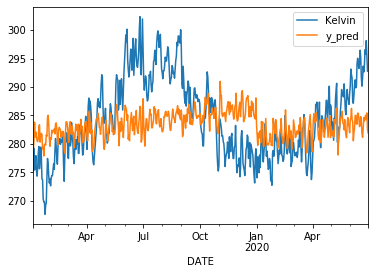

In [52]:
df_test_2[['Kelvin', 'y_pred']].plot()

In [58]:
variables_to_be_encoded = df_train[['month']]
#df_notEncoded = df.drop(columns=['yr', "mon", 'hr'])
df_encoded = pd.get_dummies(variables_to_be_encoded, columns=['month'], drop_first=True)
df_encoded.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,
1950-01-01,0,0,0,0,0,0,0,0,0,0,0
1950-01-02,0,0,0,0,0,0,0,0,0,0,0
1950-01-03,0,0,0,0,0,0,0,0,0,0,0
1950-01-04,0,0,0,0,0,0,0,0,0,0,0
1950-01-05,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df = pd.concat([df_encoded, df_train[['t-1','t-2','t-3']]], axis = 1).dropna()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t-1,t-2,t-3
DATE,,,,,,,,,,,,,,
1950-01-01,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1950-01-02,0,0,0,0,0,0,0,0,0,0,0,-0.012109,NaN,NaN
1950-01-03,0,0,0,0,0,0,0,0,0,0,0,0.016669,-0.012109,NaN
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,0.006912,0.016669,-0.012109
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,-0.010887,0.006912,0.016669


In [67]:
m = LinearRegression()
m.fit(df, y)
m.score(df, y)   # R^2

0.7930502783954272

In [68]:
variables_to_be_encoded = df_test[['month']]
#df_notEncoded = df.drop(columns=['yr', "mon", 'hr'])
df_encoded = pd.get_dummies(variables_to_be_encoded, columns=['month'], drop_first=True)

In [69]:
df_test_3 = pd.concat([df_encoded, df_test[['t-1','t-2','t-3']]], axis = 1).dropna()

In [71]:
df_test_3['y_pred'] = m.predict(df_test_3)

In [73]:
df_test_4 = pd.concat([df_test_3, df_test_2[['Kelvin']]], axis = 1)

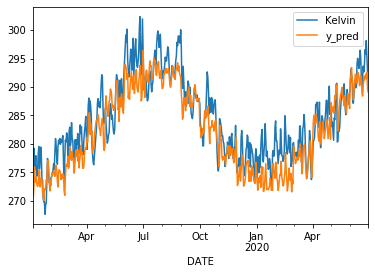

In [75]:
df_test_4[['Kelvin', 'y_pred']].plot()

In [76]:
m.coef_, m.intercept_

(array([  0.85416474,   4.21695339,   8.96546961,  13.91410231,
         17.33435856,  19.07031905,  18.58224403,  14.49773049,
          9.68333989,   4.69581972,   1.49442571, 165.10776295,
         88.81354711,  92.07205551]),
 273.48572035948155)

In [78]:
df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,t-1,t-2,t-3
DATE,,,,,,,,,,,,,,
1950-01-04,0,0,0,0,0,0,0,0,0,0,0,0.006912,0.016669,-0.012109
1950-01-05,0,0,0,0,0,0,0,0,0,0,0,-0.010887,0.006912,0.016669
1950-01-06,0,0,0,0,0,0,0,0,0,0,0,-0.010640,-0.010887,0.006912
1950-01-07,0,0,0,0,0,0,0,0,0,0,0,0.019600,-0.010640,-0.010887
1950-01-08,0,0,0,0,0,0,0,0,0,0,0,0.010509,0.019600,-0.010640
